In [1]:
#import liraries 
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

from matplotlib import patches
from scipy.spatial import ConvexHull

In [2]:
DATA_DIR = "/content/sample_data/SeoulBikeData.csv"
data = pd.read_csv(DATA_DIR, encoding= 'unicode_escape')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
print("---------------------------------------------------------------------------------")
print(f"There are {data.shape[0]} observations and {data.shape[1]} features ")
print("---------------------------------------------------------------------------------")

---------------------------------------------------------------------------------
There are 8760 observations and 14 features 
---------------------------------------------------------------------------------


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

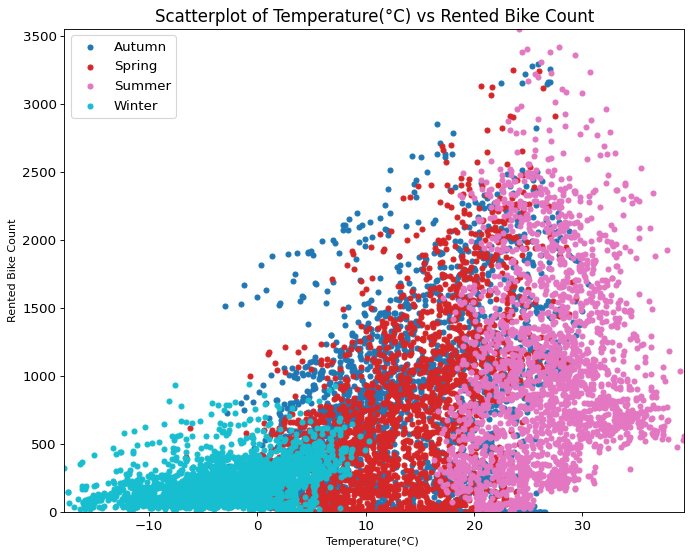

In [5]:
# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(data['Seasons'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('Temperature(°C)', 'Rented Bike Count', 
                data= data.loc[data["Seasons"]==category, :], 
                s=20, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(np.min(data['Temperature(°C)']), np.max(data['Temperature(°C)'])), ylim=(np.min(data["Rented Bike Count"]), np.max(data["Rented Bike Count"])),
              xlabel='Temperature(°C) ', ylabel='Rented Bike Count')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Temperature(°C) vs Rented Bike Count", fontsize=15)
plt.legend(fontsize=12,loc="best")    
plt.show()    

## ..The use of bike rented increased on summer and decreased on winter where the temperature around -15 to 5 (°C).

# Bubble Plot with Encircle

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

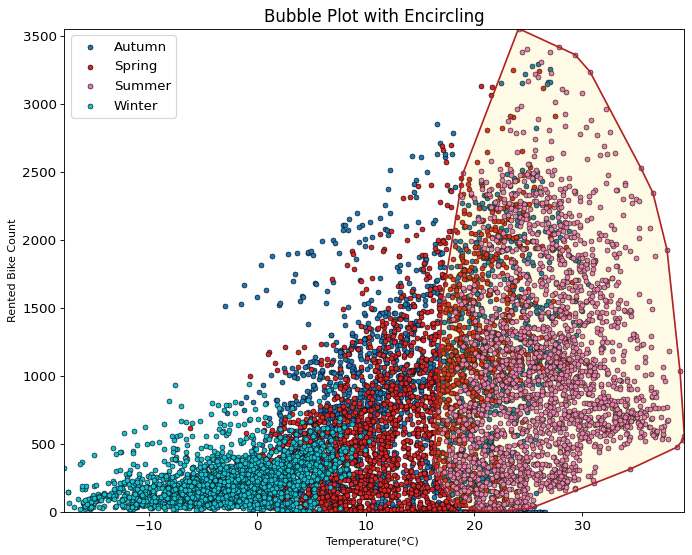

In [6]:
# As many colors as there are unique midwest['category']
categories = np.unique(data['Seasons'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('Temperature(°C)', 'Rented Bike Count', data=data.loc[data.Seasons==category, :], s=20, c=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
data_encircle = data.loc[data.Seasons=='Summer', :]                         

# Draw polygon surrounding vertices    
encircle(data_encircle["Temperature(°C)"], data_encircle['Rented Bike Count'], ec="k", fc="gold", alpha=0.1)
encircle(data_encircle["Temperature(°C)"], data_encircle['Rented Bike Count'], ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(np.min(data['Temperature(°C)']), np.max(data['Temperature(°C)'])), ylim=(np.min(data["Rented Bike Count"]), np.max(data["Rented Bike Count"])),
              xlabel='Temperature(°C) ', ylabel='Rented Bike Count')

plt.xticks(fontsize=12); 
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=15)
plt.legend(fontsize=12)    
plt.show()    

## .. You can see the importance of Rented Bike Count on Summer

# Marginal HIstogram 

<Figure size 800x640 with 0 Axes>

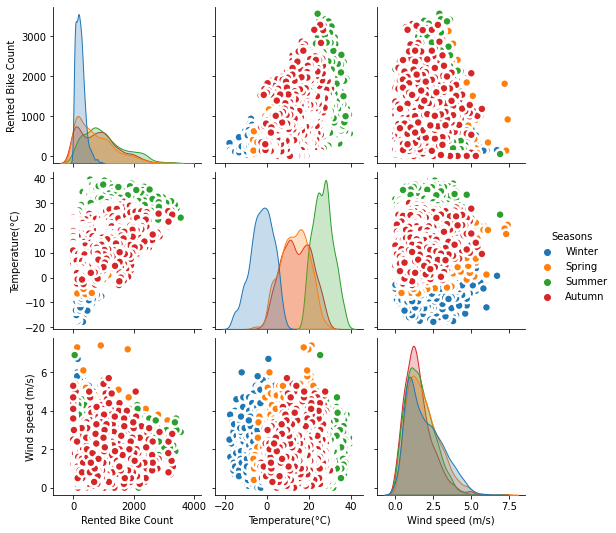

In [7]:
# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(data[["Rented Bike Count","Temperature(°C)","Seasons","Wind speed (m/s)"]], kind="scatter", hue="Seasons", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

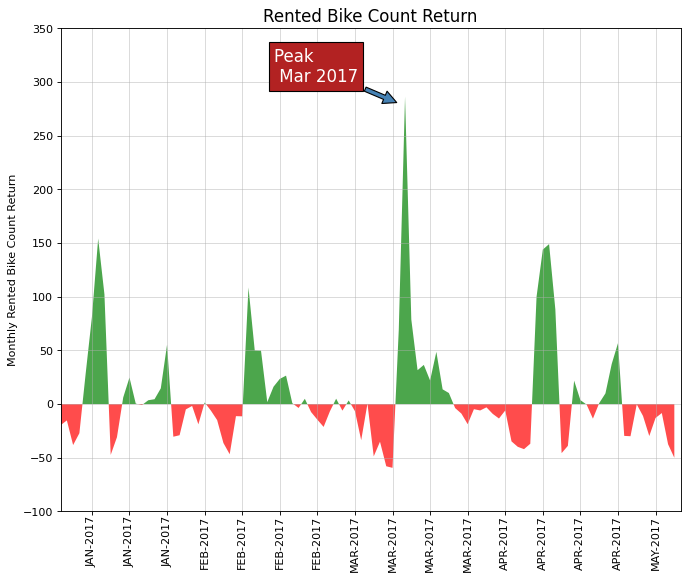

In [8]:
# Prepare Data
data_df = pd.read_csv(DATA_DIR, encoding= 'unicode_escape', parse_dates=['Date']).head(100)
x = np.arange(data_df.shape[0])
y_returns = (data_df['Rented Bike Count'].diff().fillna(0)/data_df['Rented Bike Count'].shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(10,8), dpi= 80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n Mar 2017', xy=(55.0, 280.0), xytext=(35.0, 300),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')


# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(data_df.Date.dt.year, data_df.Date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-100,350)
plt.xlim(1,100)
plt.title("Rented Bike Count Return", fontsize=15)
plt.ylabel('Monthly Rented Bike Count Return')
plt.grid(alpha=0.5)
plt.show()

# Ordered Bar Chart

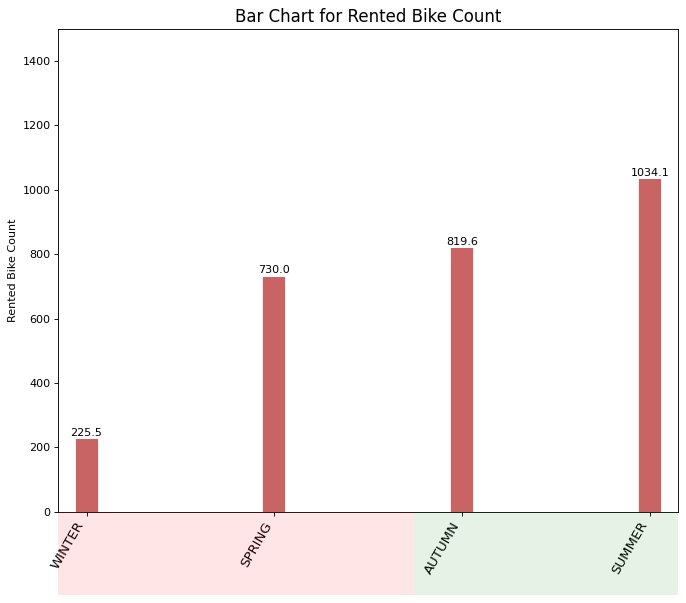

In [9]:
from locale import D_FMT
# Prepare Data
df = data[['Rented Bike Count', 'Seasons']].groupby('Seasons').apply(lambda x: x.mean())
df.sort_values('Rented Bike Count', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10,8), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df['Rented Bike Count'], color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, rbc in enumerate(df['Rented Bike Count']):
    ax.text(i, rbc+10, round(rbc, 1), horizontalalignment='center', fontsize=10)


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Rented Bike Count', fontdict={'size':15})
ax.set(ylabel='Rented Bike Count', ylim=(0, 1500))
plt.xticks(df.index, df.Seasons.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

# Lolipop Barchart

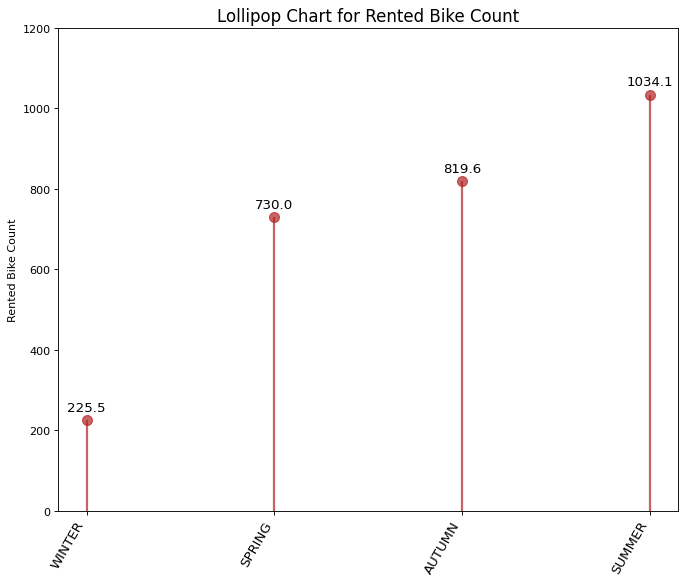

In [10]:
df = data[['Rented Bike Count', 'Seasons']].groupby('Seasons').apply(lambda x: x.mean())
df.sort_values('Rented Bike Count', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(10,8), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df['Rented Bike Count'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df['Rented Bike Count'], s=80, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Rented Bike Count', fontdict={'size':15})
ax.set_ylabel('Rented Bike Count')
ax.set_xticks(df.index)
ax.set_xticklabels(df.Seasons.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 1200)

# Annotate Text
for i, rbc in enumerate(df['Rented Bike Count']):
    ax.text(i, rbc+15, round(rbc, 1), horizontalalignment='center',verticalalignment='bottom', fontsize=12)
plt.show()

# Density Plot 

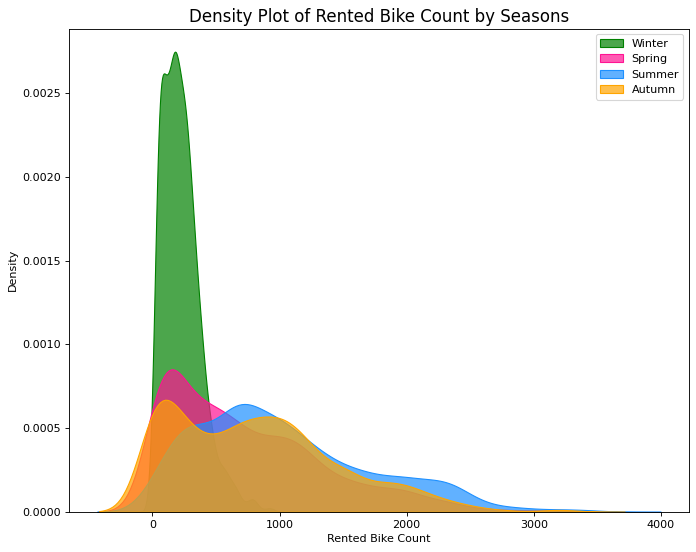

In [11]:
# Draw Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.kdeplot(data.loc[data['Seasons'] == 'Winter', "Rented Bike Count"], shade=True, color="g", label="Winter", alpha=.7)
sns.kdeplot(data.loc[data['Seasons'] == 'Spring', "Rented Bike Count"], shade=True, color="deeppink", label="Spring", alpha=.7)
sns.kdeplot(data.loc[data['Seasons'] == 'Summer', "Rented Bike Count"], shade=True, color="dodgerblue", label="Summer", alpha=.7)
sns.kdeplot(data.loc[data['Seasons'] == 'Autumn', "Rented Bike Count"], shade=True, color="orange", label="Autumn", alpha=.7)

# Decoration
plt.title('Density Plot of Rented Bike Count by Seasons', fontsize=15)
plt.legend()
plt.show()

#  Density Curves with Histogram

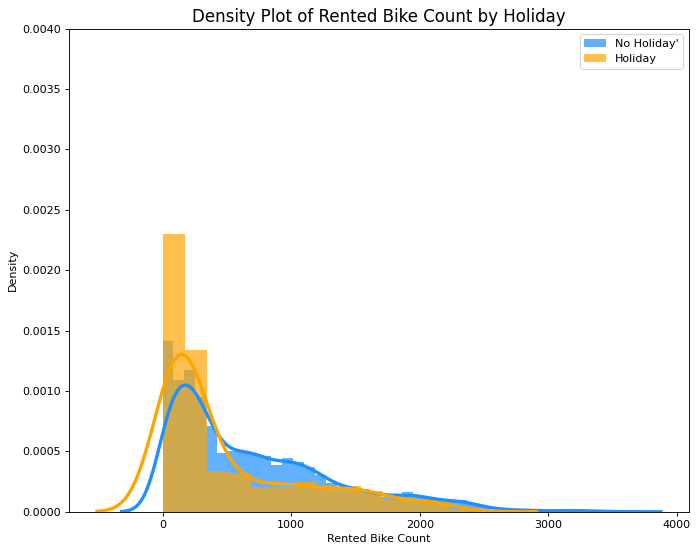

In [12]:
# Draw Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.distplot(data.loc[data['Holiday'] == 'No Holiday', "Rented Bike Count"], color="dodgerblue", label="No Holiday'", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(data.loc[data['Holiday'] == 'Holiday', "Rented Bike Count"], color="orange", label="Holiday", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.004)

# Decoration
plt.title('Density Plot of Rented Bike Count by Holiday', fontsize=15)
plt.legend()
plt.show()

# Box Plot

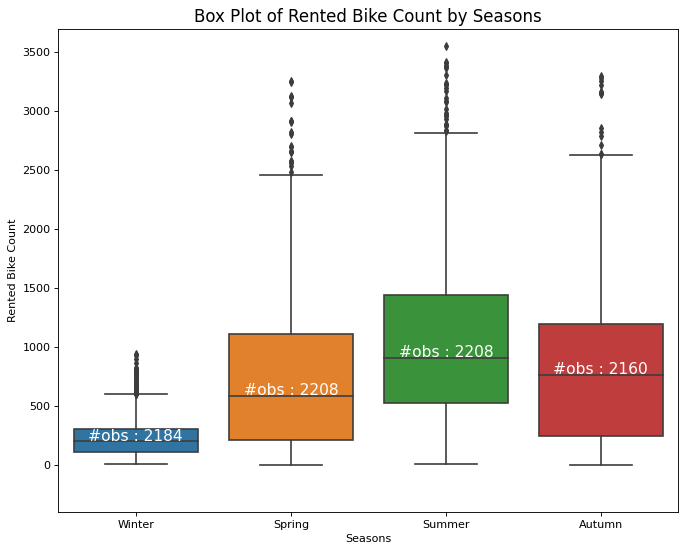

In [13]:
# Draw Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.boxplot(x='Seasons', y='Rented Bike Count', data=data, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(data,group_col='Seasons',y='Rented Bike Count')    

# Decoration
plt.title('Box Plot of Rented Bike Count by Seasons', fontsize=15)
plt.ylim(-400, 3700)
plt.show()

# Pie Chart

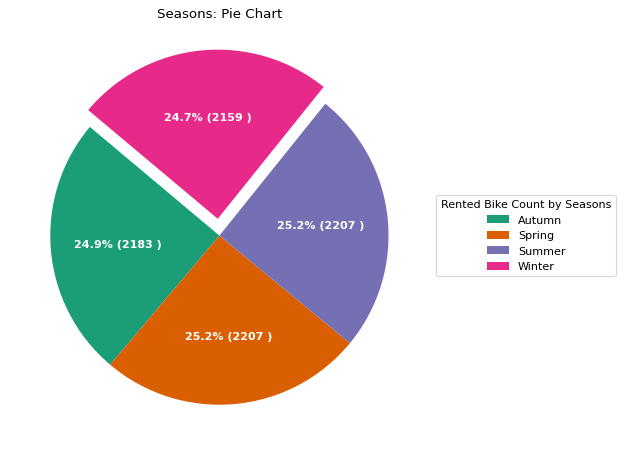

In [14]:
# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

# Prepare Data
df = data.groupby('Seasons').size().reset_index(name='counts')

data_df = df['counts']
categories = df['Seasons']
explode = [0,0,0,0.1]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data_df, 
                                  autopct=lambda pct: func(pct, data_df),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Rented Bike Count by Seasons", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Seasons: Pie Chart")
plt.show()

# Time Series with Error Bands

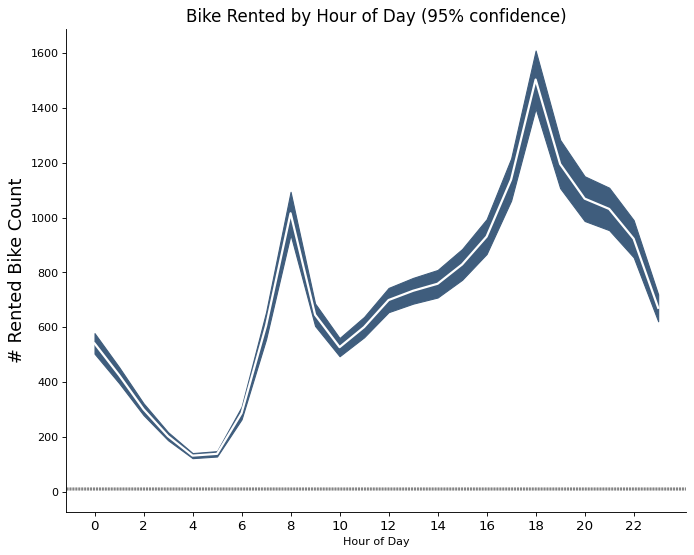

In [15]:
from scipy.stats import sem

# Import Data
data_mean = data.groupby('Hour')["Rented Bike Count"].mean()
data_se = data.groupby('Hour')["Rented Bike Count"].apply(sem).mul(1.96)

# Plot
plt.figure(figsize=(10,8), dpi= 80)
plt.ylabel("# Rented Bike Count", fontsize=16)  
x = data_mean.index
plt.plot(x, data_mean, color="white", lw=2) 
plt.fill_between(x, data_mean - data_se, data_mean + data_se, color="#3F5D7D")  

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::2], [str(d) for d in x[::2]] , fontsize=12)
plt.title("Bike Rented by Hour of Day (95% confidence)", fontsize=15)
plt.xlabel("Hour of Day")

s, e = plt.gca().get_xlim()
plt.xlim(s, e)

# Draw Horizontal Tick lines  
for y in range(8, 20, 2):    
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5)

plt.show()

# Paralel Coordinates


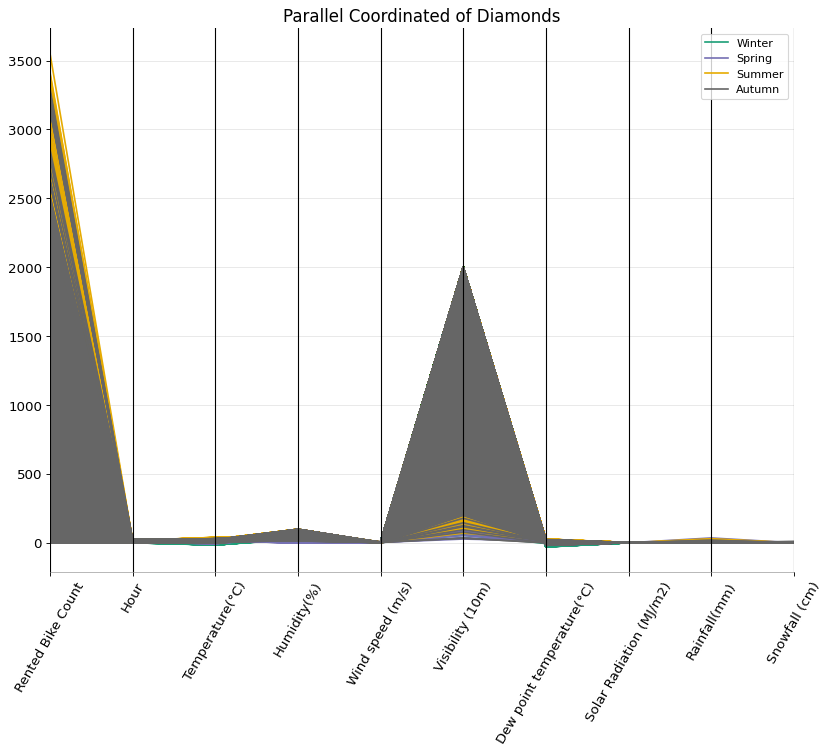

In [16]:
from pandas.plotting import parallel_coordinates

# Plot
plt.figure(figsize=(12,9), dpi= 80)
data.drop(['Date','Holiday', 'Functioning Day'],axis=1,inplace=True)
parallel_coordinates(data, 'Seasons', colormap='Dark2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=15)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12,rotation=60,)
plt.yticks(fontsize=12)
plt.show()

## .. You can see the explanations about the visualization: [here](www.google.com)